In [1]:
import osmnx as ox
import networkx as nx

# Load the saved road network
road_network = ox.load_graphml("../data/blacksburg_road_network.graphml")
print("Road network loaded successfully.")


Road network loaded successfully.


In [9]:
#Extracting Useful data like nodes(intersections) and edges(roads with distances)

G = nx.MultiDiGraph(road_network)


# Add distances to edges in MultiDiGraph
for u, v, key, data in G.edges(keys=True, data=True):
    data['weight'] = data.get('length', 1)


In [10]:
# Define start and goal coordinates (latitude, longitude)
start_coords = (37.2296, -80.4139)  # Example: Downtown Blacksburg
goal_coords = (37.2431, -80.4226)   # Example: VT Campus

# Find the nearest graph nodes to the coordinates
start_node = ox.distance.nearest_nodes(G, X=start_coords[1], Y=start_coords[0])
goal_node = ox.distance.nearest_nodes(G, X=goal_coords[1], Y=goal_coords[0])

print(f"Start node: {start_node}, Goal node: {goal_node}")


Start node: 216474016, Goal node: 726760648


In [11]:
from aStar_custom import astar_pathfinding

shortest_path = astar_pathfinding(G, start_node, goal_node)

if shortest_path:
    print(f"Shortest path: {shortest_path}")
else:
    print("No path found")

Shortest path: [216474016, 216475664, 216464362, 5879243701, 5879243707, 216434655, 729524223, 724830186, 1533386441, 1444098616, 1444098620, 724829991, 724830252, 729484737, 726760156, 726768218, 726777615, 726760648]


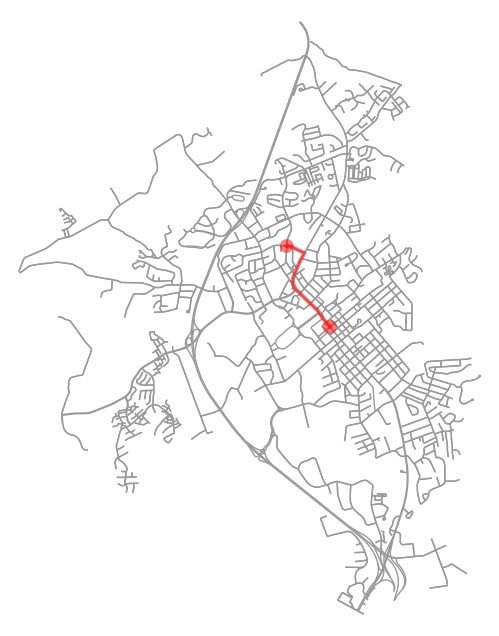

In [12]:
import matplotlib.pyplot as plt

# Plot the road network and the shortest path
fig, ax = ox.plot_graph_route(
    G, 
    route=shortest_path, 
    route_linewidth=3, 
    node_size=0, 
    bgcolor="white"
)
plt.show()


In [ ]:
# Reviewed changes